# Muon Lifetime

Santiago R. , Birge Súkrú "Ken"

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cs
import pandas as pd
Data_Path = "Data/"

In [228]:
100*1e3/(2*1e-6)/cs.c

166.78204759907604

In [229]:
v = cs.c/10
v*2*1e-6

59.9584916

## Energy Losses

In [230]:
Beta = 0.997
Gamma = 1/np.sqrt(1-Beta**2)
z = 1 #muon charge
K = -4*np.pi/(cs.m_e*cs.c**2)
K_2 = (cs.e**2/(4*np.pi*cs.epsilon_0))**2
n_al = cs.N_A*13*2.7*1e6/(26.981539)
n_lead = cs.N_A*82*11.34*1e6/(207.2)
I_Al = 10*cs.e*13
I_Lead = 10*cs.e*82
ln_Al = 2*cs.m_e*cs.c**2*Beta**2/(I_Al*(1-Beta**2))
ln_Lead = 2*cs.m_e*cs.c**2*Beta**2/(I_Lead*(1-Beta**2))
dEdx_Al = K*n_al*z**2/Beta**2*K_2*(np.log(ln_Al)-Beta**2) *1e-6*1e-2/cs.e
dEdx_Lead = K*n_lead*z**2/Beta**2*K_2*(np.log(ln_Lead)-Beta**2) *1e-6*1e-2/cs.e
print(dEdx_Al, "MeV/cm")
print(dEdx_Lead, "MeV/cm")

-5.259466094178444 MeV/cm
-15.590779410671892 MeV/cm


In [231]:
dEdx_Al*6

-31.556796565070666

In [232]:
dEdx_Lead*10

-155.90779410671894

In [233]:
1.6726219*1e-27*cs.c*5/cs.e

15.648693785208149

## On-Site Measurements and calculations

### Runtime behavior of signals

### Event Rates - Photomultipliers, Light Room

In [234]:
#PMT1
dNdt = np.array([713,673,670,673,667,670,681,742,639,651])
dt = 1 #second
Impedanz = 50 #ohm, Quad Scaler

In [235]:
#PMT2
dNdt = np.array([1390,1282,1470,1370,1301,1250,1201,1238,1244,1547])
dt = 1 #second

In [236]:
#PMT3
dNdt = np.array([44712,42164,39170,37567,39240,38539,36668,36473,39693,36576])
dt = 1 #second

In [237]:
#PMT4
dNdt = np.array([829,885,838,879,836,812,894,836,899,865])
dt = 1 #second

In [238]:
#PMT5
dNdt = np.array([23246,22930,23513,19091,19692,20946,20712,22777,20511,20160])
dt = 1 #second

Event Rates - Photomultipliers, Dark Room

In [239]:
#PMT1
dNdt = np.array([508,456,422,488,507,481,532,534,580,492])
dt = 1 #second
Impedanz = 50 #ohm, Quad Scaler

In [240]:
#PMT2
dNdt = np.array([1335,1360,1202,1278,1332,1163,1271,1338,1308,1317])
dt = 1 #second

In [241]:
#PMT3
dNdt = np.array([9502,9084,8716,9737,6833,6973,6758,6815,6656,6544,5417,9794])
dt = 1 #second

In [242]:
#PMT4
dNdt = np.array([726,901,834,924,982,951,858,854,851,945,767,800])
dt = 1 #second

In [243]:
#PMT5
dNdt = np.array([5414,6171,5245,7166,5224,5454,7847,7833,8470,9521,6790,6401])
dt = 1 #second

Event Rates - Scintillators

In [244]:
#SC1 - same as PMT 1
dNdt = np.array([508,456,422,488,507,481,532,534,580,492])
dt = 1 #second
Impedanz = 50 #ohm, Quad Scaler

In [245]:
#SC2 - PMT 2 and 4
dNdt = np.array([153,147,144,144,135,119,165,165,130,163])
dt = 1 #second

In [246]:
#SC3 - PMT 3 and 5
dNdt = np.array([156,170,171,157,149,162,129,172,161,173,164,154])
dt = 1 #second

In [247]:
#SC1 and SC2
dNdt = np.array([19,14,14,11,19,11,8,11,11,16,12,27])
dt = 1 #second

In [248]:
#SC1, SC2 and SC3
dNdt = np.array([2,5,8,4,3,4,10,4,8,6,7,2])
dt = 1 #second

In [249]:
#SC1 and SC2 with SC3 Veto
dNdt = np.array([11,6,8,11,15,13,8,12,13,13])
dt = 1 #second

In [250]:
#SC2 and SC3
dNdt = np.array([16,20,15,20,22,17,14,14,12,25])
dt = 1 #second

In [251]:
#SC2 or SC3
dNdt = np.array([348,302,304,261,306,288,301,287,291,269])
dt = 1 #second

### Data Reading

In [252]:
Data = pd.read_csv(Data_Path+"MainRun1.Spe")

In [253]:
Data

$SPEC_ID:
0                 No sample description was entered.
1                                         $SPEC_REM:
2                                             DET# 1
3                DETDESC# FP03 Model 928 SN 19353133
4                           AP# Maestro Version 7.01
...                                              ...
16404                                              3
16405  -5.212607E+001 2.996516E+000 0.000000E+000 ns
16406                                    $SHAPE_CAL:
16407                                              3
16408      0.000000E+000 0.000000E+000 0.000000E+000

[16409 rows x 1 columns]

In [254]:
x = int(len(Data))-10
A = np.array(Data['$SPEC_ID:'][11:16000], dtype=int)

In [255]:
A

array([0, 0, 0, ..., 0, 0, 0])

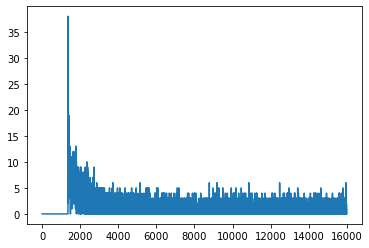

In [256]:
channels = np.arange(1,len(A)+1,1)
plt.plot(channels,A)

### Signal Delays

In [257]:
#Quad Coincidence Passthrough SC1 to Coincidence Unit Start Signal Logic
dt = 18 #ns

#Quad Coincidence SC2 or SC3 to Coincidence Unit Stop Signal Generator/Logic
dt = 15.6 #ns

### Muon Lifetime [Dr. Marzieh Bahmani]

In [258]:
%matplotlib inline
import importlib
if not importlib.util.find_spec('iminuit'):
    !conda install -c conda-forge iminuit
import iminuit
%load_ext autoreload
%autoreload 1
%run muonutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 432x288 with 0 Axes>

### Time Calibration Parser

In [259]:
import numpy as np
import matplotlib.pyplot as plt

with open("Data/Calibration/2mys.Spe") as fp:
    Lines = fp.readlines()
    print(len(Lines))
    count = 0
    for line in Lines:
        count += 1
        if "0 16383" in line:
            start = count
            break
    print("done")
    print(start)
    end = start+16383
    print(end)
    
x = np.arange(0,16383)


16410
done
12
16395


120


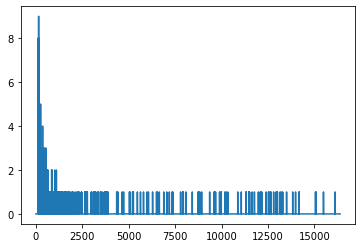

In [260]:
with open("Data/Calibration/80ns.Spe") as fp:
    Lines = fp.readlines()
    data = [int(i) for i in Lines[start:end]]
    dta = np.array(data)

for i,val in enumerate(data):
    if val != 0:
        print(i+1)
        break
plt.plot(x,data,)

682


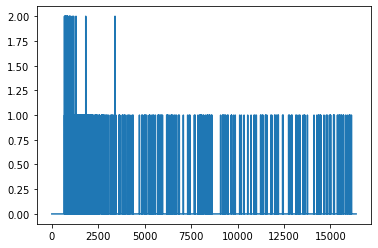

In [261]:
with open("Data/Calibration/2mys.Spe") as fp:
    Lines = fp.readlines()
    data = [int(i) for i in Lines[start:end]]
    dta = dta + np.array(data)

for i,val in enumerate(data):
    if val != 0:
        print(i+1)
        break
plt.plot(x,data,)

1367


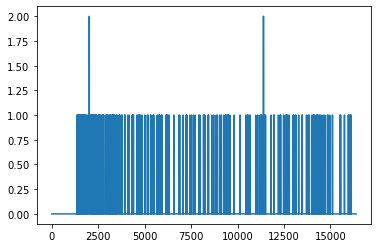

In [262]:
with open("Data/Calibration/4_04.Spe") as fp:
    Lines = fp.readlines()
    data = [int(i) for i in Lines[start:end]]
    dta = dta + np.array(data)

for i,val in enumerate(data):
    if val != 0:
        print(i+1)
        break
plt.plot(x,data,)

2031


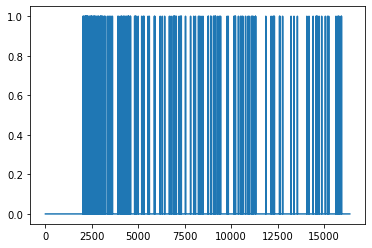

In [263]:
with open("Data/Calibration/6_02mys.Spe") as fp:
    Lines = fp.readlines()
    data = [int(i) for i in Lines[start:end]]
    dta = dta + np.array(data)

for i,val in enumerate(data):
    if val != 0:
        print(i+1)
        break
plt.plot(x,data,)

2716


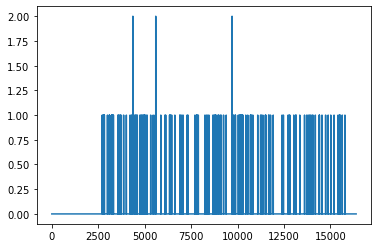

In [264]:
with open("Data/Calibration/8_04mys.Spe") as fp:
    Lines = fp.readlines()
    data = [int(i) for i in Lines[start:end]]
    dta = dta + np.array(data)

for i,val in enumerate(data):
    if val != 0:
        print(i+1)
        break
plt.plot(x,data,)

3387


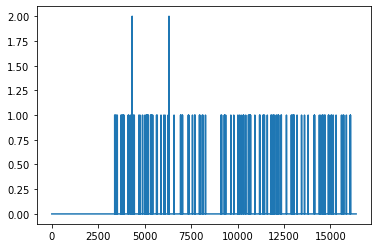

In [265]:
with open("Data/Calibration/10mys.Spe") as fp:
    Lines = fp.readlines()
    data = [int(i) for i in Lines[start:end]]
    dta = dta + np.array(data)

for i,val in enumerate(data):
    if val != 0:
        print(i+1)
        break
plt.plot(x,data,)

4112


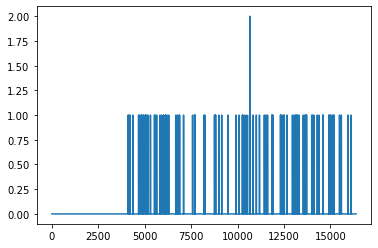

In [266]:
with open("Data/Calibration/12mys.Spe") as fp:
    Lines = fp.readlines()
    data = [int(i) for i in Lines[start:end]]
    dta = dta + np.array(data)

for i,val in enumerate(data):
    if val != 0:
        print(i+1)
        break
plt.plot(x,data,)

4242


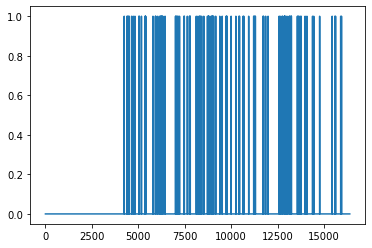

In [267]:
with open("Data/Calibration/12_5mys.Spe") as fp:
    Lines = fp.readlines()
    data = [int(i) for i in Lines[start:end]]
    dta = dta + np.array(data)

for i,val in enumerate(data):
    if val != 0:
        print(i+1)
        break
plt.plot(x,data,)

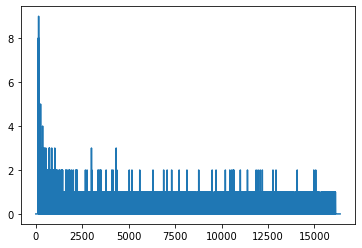

In [268]:
lines = ['       ' + str(i) + '\n' for i in dta]
with open("Data/Calibration/Calibration Parsed.Spe", "w") as fp:
    Lines[start:end] = lines
    fp.writelines(Lines)

plt.plot(x,dta)    
del dta

### Background Signal and Delay

In [269]:
def draw_lifetime_spectrum(spectrum, fitresult=None):
    fig, ax = plt.subplots(figsize=(7., 5.))
    ax.set_ylabel('Entries')
    if spectrum.axislabel is not None:
        ax.set_xlabel(spectrum.axislabel)
    ax.margins(x=0)
    ax.hist(x=spectrum.centers, bins=spectrum.edges, weights=spectrum.values, histtype='step')
    if fitresult is not None:
        x = np.linspace(spectrum.edges[0], spectrum.edges[-1], 501)
        ax.plot(x, fitresult.curve(*fitresult.values)(x), zorder=0)

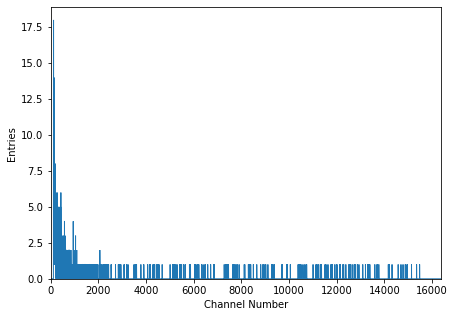

In [270]:
draw_lifetime_spectrum(load_spectrum("Data/Background.Spe"))
plt.savefig('background_spectrum.pdf')

### Calibration

In [271]:
def draw_calibration_spectrum(spectrum, points):
    fig, ax = plt.subplots(nrows=2, sharex=True, gridspec_kw=dict(hspace=0), figsize=(7., 7.))
    ax[-1].set_xlabel('Channel number')
    ax[0].set_ylabel('Entries')
    ax[0].margins(x=0, y=0.25)
    ax[0].hist(bins=spectrum.edges, x=spectrum.centers, weights=spectrum.values, histtype='step')
    for i in range(len(points)):
        chan_no = points.at[i,'chan']
        text = '%.1f' % points.at[i,'time']
        color = 'gray'
        ax[0].annotate(text, xy=(chan_no, spectrum.values[chan_no]), xytext=(0., 15.), va='baseline', ha='center', fontsize='smaller', textcoords='offset points', color=color, arrowprops=dict(arrowstyle='->', shrinkA=0.1, facecolor=color, edgecolor=color))
    ax[1].set_ylabel('Time [μs]')
    ax[1].errorbar(points.chan, points.time, xerr=points.chan_err, yerr=points.time_err, fmt='none', edgecolor='k')

def draw_calibration_fit(points, fitresult):
    fig, ax = plt.subplots(figsize=(5., 5.))
    ax.set_xlabel('Channel number')
    ax.set_ylabel('Time [μs]')
    ax.errorbar(points.chan, points.time, xerr=points.chan_err, yerr=points.time_err, fmt='none', edgecolor='k', zorder=1)
    if fitresult is not None:
        x = np.linspace(0., 4296., 4296, False)
        ax.plot(x, fitresult.curve(*fitresult.values)(x), zorder=0)

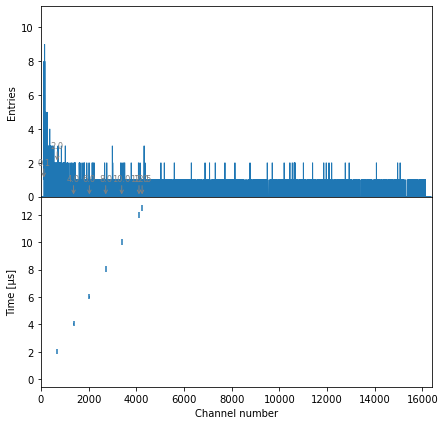

In [272]:
calibration_points = pd.DataFrame(columns=['chan', 'time', 'chan_err', 'time_err'], data=[
# Format:
#       (Channel number, time, error of channel number, error of time)
# Beispiel:
       (120,   0.08,  5,  0.02),
       (682,  2.,  5,  0.2),
       (1367,  4.04,  5,  0.2),
       (2031,  6.02,  5,  0.2),
       (2716,  8.04,  5,  0.2),
       (3387,  10.,  5,  0.2),
       (4112,  12.,  5,  0.2),
       (4242,  12.5,  5,  0.2),
    ])
draw_calibration_spectrum(load_spectrum('Data/Calibration/Calibration Parsed.Spe'), calibration_points)
plt.savefig('calibration_spectrum.pdf')

In [273]:
def fit_calibration(points):
    def line(m, b):
        '''Return a line with slope m and intercept b.'''
        return lambda x: m * x + b
    return fit(method=weighted_least_squares,
               curve=line,
               data=dict(
                   x=points.chan.values,
                   y=points.time.values,
                   ey=points.time_err.values
               ),
               params=dict(
                   m=0.01, error_m=0.01,
                   b=0., error_b=0.01
               ))

calibration = fit_calibration(calibration_points)

In [274]:
calibration

FitResult(minuit=<iminuit._libiminuit.Minuit object at 0x55d44c8a3d70>, names=('m', 'b'), values=array([ 0.00302791, -0.27909678]), covariance=array([[ 7.55639771e-10, -2.15653940e-07],
       [-2.15653940e-07,  4.35377799e-04]]), fcn=<function weighted_least_squares.<locals>.fcn at 0x7f8ea9b847a0>, fval=3.642617317060767, data={'x': array([ 120.,  682., 1367., 2031., 2716., 3387., 4112., 4242.]), 'y': array([ 0.08,  2.  ,  4.04,  6.02,  8.04, 10.  , 12.  , 12.5 ]), 'ey': array([0.02, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ])}, method=<function weighted_least_squares at 0x7f8ea9a6bef0>, is_fixed=array([False, False]), curve=<function fit_calibration.<locals>.line at 0x7f8ea9b84ef0>)

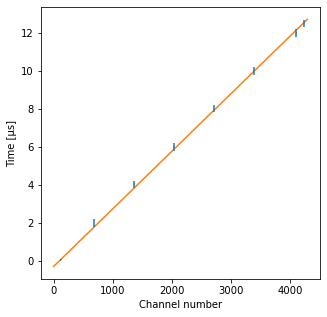

In [275]:
draw_calibration_fit(calibration_points, calibration)
plt.savefig('calibration_fit.pdf')

In [276]:
calibration.values

array([ 0.00302791, -0.27909678])

In [277]:
calibration.fval

3.642617317060767

In [278]:
calibration.curve(*calibration.values)(np.array([500, 1000, 1500]))

array([1.23485933, 2.74881545, 4.26277156])

In [279]:
3.643/5

0.7285999999999999

### Fit

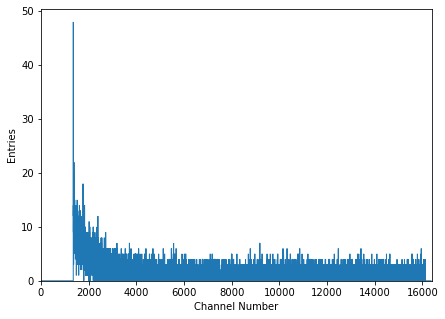

In [280]:
raw_spectrum = load_spectrum('Data/MainRunFinal.Spe')
draw_lifetime_spectrum(raw_spectrum)
plt.savefig('raw_spectrum.pdf')

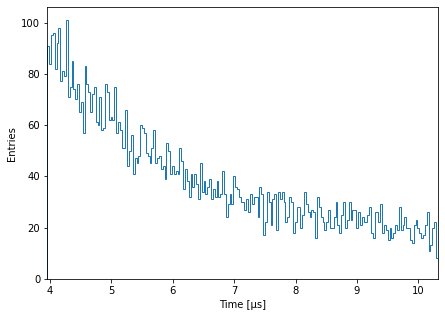

In [295]:
spectrum = raw_spectrum
spectrum = spectrum.rebin(start=1400, stop=3500, ngroup=10)
spectrum = spectrum.replace_axis(calibration.curve(*calibration.values)(spectrum.edges), 'Time [μs]')
draw_lifetime_spectrum(spectrum)
plt.savefig('rebinned_spectrum.pdf')

In [296]:
def fit_spectrum(spectrum, **params):
    # Define curve to be fitted:
    from numpy import exp
    def curve(tau_mu, n, c):
        f = 1.27
        Q = 0.993
        A = 0.7054
        tau_eff = 1/(Q/tau_mu+A)
        return lambda t: n / tau_mu * exp(-t/tau_mu) + n / (f*tau_eff) * exp(-t/tau_eff) + c
    # Default parameter configuration:
    params.setdefault('tau_mu', 1.)
    params.setdefault('error_tau_mu', params['tau_mu'])
    params.setdefault('n', 1000.)
    params.setdefault('error_n', params['n'])
    params.setdefault('c', spectrum.values[-4:].mean())
    params.setdefault('error_c', params['c'])
    # Run fit at the bin centers:
    return fit(method=chi_squared,
               curve=curve,
               data=spectrum,
               params=params)

FitResult(minuit=<iminuit._libiminuit.Minuit object at 0x55d44aecf930>, names=('tau_mu', 'n', 'c'), values=array([  2.16949908, 938.01977494,  15.66621849]), covariance=array([[ 3.17222673e-02, -1.30236183e+01, -2.48391395e-01],
       [-1.30236183e+01,  5.92005023e+03,  9.19715500e+01],
       [-2.48391395e-01,  9.19715500e+01,  2.27220555e+00]]), fcn=<function chi_squared.<locals>.fcn at 0x7f8ea87df710>, fval=161.53708283798113, data={'x': array([ 3.97360594,  4.00388506,  4.03416419,  4.06444331,  4.09472243,
        4.12500155,  4.15528068,  4.1855598 ,  4.21583892,  4.24611804,
        4.27639717,  4.30667629,  4.33695541,  4.36723453,  4.39751365,
        4.42779278,  4.4580719 ,  4.48835102,  4.51863014,  4.54890927,
        4.57918839,  4.60946751,  4.63974663,  4.67002575,  4.70030488,
        4.730584  ,  4.76086312,  4.79114224,  4.82142137,  4.85170049,
        4.88197961,  4.91225873,  4.94253786,  4.97281698,  5.0030961 ,
        5.03337522,  5.06365434,  5.09393347,  5.12421259,  5.15449171,
        5.18477083,  5.21504996,  5.24532908,  5.2756082 ,  5.30588732,
        5.33616644,  5.36644557,  5.39672469,  5.42700381,  5.45728293,
        5.48756206,  5.51784118,  5.5481203 ,  5.57839942,  5.60867855,
        5.63895767,  5.66923679,  5.69951591,  5.72979503,  5.76007416,
        5.79035328,  5.8206324 ,  5.85091152,  5.88119065,  5.91146977,
        5.94174889,  5.97202801,  6.00230714,  6.03258626,  6.06286538,
        6.0931445 ,  6.12342362,  6.15370275,  6.18398187,  6.21426099,
        6.24454011,  6.27481924,  6.30509836,  6.33537748,  6.3656566 ,
        6.39593572,  6.42621485,  6.45649397,  6.48677309,  6.51705221,
        6.54733134,  6.57761046,  6.60788958,  6.6381687 ,  6.66844783,
        6.69872695,  6.72900607,  6.75928519,  6.78956431,  6.81984344,
        6.85012256,  6.88040168,  6.9106808 ,  6.94095993,  6.97123905,
        7.00151817,  7.03179729,  7.06207642,  7.09235554,  7.12263466,
        7.15291378,  7.1831929 ,  7.21347203,  7.24375115,  7.27403027,
        7.30430939,  7.33458852,  7.36486764,  7.39514676,  7.42542588,
        7.455705  ,  7.48598413,  7.51626325,  7.54654237,  7.57682149,
        7.60710062,  7.63737974,  7.66765886,  7.69793798,  7.72821711,
        7.75849623,  7.78877535,  7.81905447,  7.84933359,  7.87961272,
        7.90989184,  7.94017096,  7.97045008,  8.00072921,  8.03100833,
        8.06128745,  8.09156657,  8.1218457 ,  8.15212482,  8.18240394,
        8.21268306,  8.24296218,  8.27324131,  8.30352043,  8.33379955,
        8.36407867,  8.3943578 ,  8.42463692,  8.45491604,  8.48519516,
        8.51547428,  8.54575341,  8.57603253,  8.60631165,  8.63659077,
        8.6668699 ,  8.69714902,  8.72742814,  8.75770726,  8.78798639,
        8.81826551,  8.84854463,  8.87882375,  8.90910287,  8.939382  ,
        8.96966112,  8.99994024,  9.03021936,  9.06049849,  9.09077761,
        9.12105673,  9.15133585,  9.18161497,  9.2118941 ,  9.24217322,
        9.27245234,  9.30273146,  9.33301059,  9.36328971,  9.39356883,
        9.42384795,  9.45412708,  9.4844062 ,  9.51468532,  9.54496444,
        9.57524356,  9.60552269,  9.63580181,  9.66608093,  9.69636005,
        9.72663918,  9.7569183 ,  9.78719742,  9.81747654,  9.84775567,
        9.87803479,  9.90831391,  9.93859303,  9.96887215,  9.99915128,
       10.0294304 , 10.05970952, 10.08998864, 10.12026777, 10.15054689,
       10.18082601, 10.21110513, 10.24138425, 10.27166338, 10.3019425 ]), 'y': array([ 91.,  84.,  95.,  96.,  82.,  92.,  98.,  77.,  81.,  79., 101.,
        71.,  75.,  85.,  74.,  70.,  76.,  65.,  69.,  57.,  83.,  76.,
        73.,  65.,  72.,  75.,  61.,  60.,  71.,  58.,  59.,  76.,  73.,
        62.,  63.,  62.,  75.,  57.,  61.,  58.,  51.,  51.,  66.,  44.,
        50.,  56.,  41.,  47.,  45.,  48.,  60.,  59.,  57.,  49.,  48.,
        45.,  51.,  58.,  45.,  47.,  48.,  43.,  44.,  39.,  53.,  50.,
        41.,  44.,  41.,  42.,  41.,  51.,  46.,  35.,  43.,  38.,  32.,
        41.,

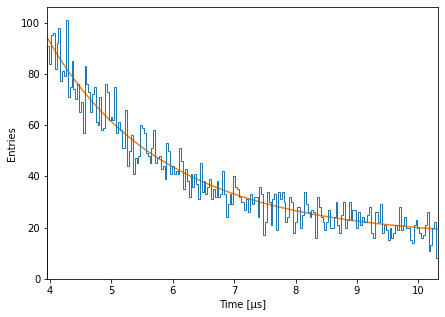

In [297]:
fitresult = fit_spectrum(spectrum)
display(fitresult) 
draw_lifetime_spectrum(spectrum, fitresult)
plt.savefig('fit_spectrum.pdf')

### Systematic Errors

[ 0.0028967  -0.26700259]


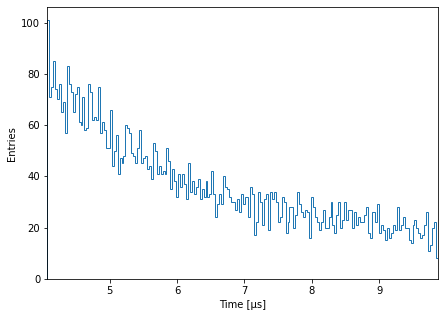

In [284]:
spectrum = raw_spectrum
spectrum = spectrum.rebin(start=1500, stop=3500, ngroup=10)
modified_calibration = calibration.values- calibration.values*(0.013/0.3)
spectrum = spectrum.replace_axis(calibration.curve(*modified_calibration)(spectrum.edges), 'Time [μs]')
draw_lifetime_spectrum(spectrum)
print(modified_calibration)

FitResult(minuit=<iminuit._libiminuit.Minuit object at 0x55d44d7d4690>, names=('tau_mu', 'n', 'c'), values=array([  2.07942891, 888.99009119,  15.68693599]), covariance=array([[ 4.14819470e-02, -1.84929585e+01, -3.14486226e-01],
       [-1.84929585e+01,  8.91713001e+03,  1.28565439e+02],
       [-3.14486226e-01,  1.28565439e+02,  2.74071453e+00]]), fcn=<function chi_squared.<locals>.fcn at 0x7f8ea916d440>, fval=156.71013430133382, data={'x': array([4.09108662, 4.12005365, 4.14902068, 4.1779877 , 4.20695473,
       4.23592176, 4.26488878, 4.29385581, 4.32282284, 4.35178986,
       4.38075689, 4.40972392, 4.43869095, 4.46765797, 4.496625  ,
       4.52559203, 4.55455905, 4.58352608, 4.61249311, 4.64146013,
       4.67042716, 4.69939419, 4.72836121, 4.75732824, 4.78629527,
       4.8152623 , 4.84422932, 4.87319635, 4.90216338, 4.9311304 ,
       4.96009743, 4.98906446, 5.01803148, 5.04699851, 5.07596554,
       5.10493257, 5.13389959, 5.16286662, 5.19183365, 5.22080067,
       5.2497677 , 5.27873473, 5.30770175, 5.33666878, 5.36563581,
       5.39460284, 5.42356986, 5.45253689, 5.48150392, 5.51047094,
       5.53943797, 5.568405  , 5.59737202, 5.62633905, 5.65530608,
       5.68427311, 5.71324013, 5.74220716, 5.77117419, 5.80014121,
       5.82910824, 5.85807527, 5.88704229, 5.91600932, 5.94497635,
       5.97394338, 6.0029104 , 6.03187743, 6.06084446, 6.08981148,
       6.11877851, 6.14774554, 6.17671256, 6.20567959, 6.23464662,
       6.26361365, 6.29258067, 6.3215477 , 6.35051473, 6.37948175,
       6.40844878, 6.43741581, 6.46638283, 6.49534986, 6.52431689,
       6.55328391, 6.58225094, 6.61121797, 6.640185  , 6.66915202,
       6.69811905, 6.72708608, 6.7560531 , 6.78502013, 6.81398716,
       6.84295418, 6.87192121, 6.90088824, 6.92985527, 6.95882229,
       6.98778932, 7.01675635, 7.04572337, 7.0746904 , 7.10365743,
       7.13262445, 7.16159148, 7.19055851, 7.21952554, 7.24849256,
       7.27745959, 7.30642662, 7.33539364, 7.36436067, 7.3933277 ,
       7.42229472, 7.45126175, 7.48022878, 7.50919581, 7.53816283,
       7.56712986, 7.59609689, 7.62506391, 7.65403094, 7.68299797,
       7.71196499, 7.74093202, 7.76989905, 7.79886608, 7.8278331 ,
       7.85680013, 7.88576716, 7.91473418, 7.94370121, 7.97266824,
       8.00163526, 8.03060229, 8.05956932, 8.08853635, 8.11750337,
       8.1464704 , 8.17543743, 8.20440445, 8.23337148, 8.26233851,
       8.29130553, 8.32027256, 8.34923959, 8.37820661, 8.40717364,
       8.43614067, 8.4651077 , 8.49407472, 8.52304175, 8.55200878,
       8.5809758 , 8.60994283, 8.63890986, 8.66787688, 8.69684391,
       8.72581094, 8.75477797, 8.78374499, 8.81271202, 8.84167905,
       8.87064607, 8.8996131 , 8.92858013, 8.95754715, 8.98651418,
       9.01548121, 9.04444824, 9.07341526, 9.10238229, 9.13134932,
       9.16031634, 9.18928337, 9.2182504 , 9.24721742, 9.27618445,
       9.30515148, 9.33411851, 9.36308553, 9.39205256, 9.42101959,
       9.44998661, 9.47895364, 9.50792067, 9.53688769, 9.56585472,
       9.59482175, 9.62378878, 9.6527558 , 9.68172283, 9.71068986,
       9.73965688, 9.76862391, 9.79759094, 9.82655796, 9.85552499]), 'y': array([101.,  71.,  75.,  85.,  74.,  70.,  76.,  65.,  69.,  57.,  83.,
        76.,  73.,  65.,  72.,  75.,  61.,  60.,  71.,  58.,  59.,  76.,
        73.,  62.,  63.,  62.,  75.,  57.,  61.,  58.,  51.,  51.,  66.,
        44.,  50.,  56.,  41.,  47.,  45.,  48.,  60.,  59.,  57.,  49.,
        48.,  45.,  51.,  58.,  45.,  47.,  48.,  43.,  44.,  39.,  53.,
        50.,  41.,  44.,  41.,  42.,  41.,  51.,  46.,  35.,  43.,  38.,
        32.,  41.,  36.,  41.,  37.,  31.,  45.,  34.,  38.,  33.,  36.,
        39.,  31.,  35.,  32.,  38.,  32.,  33.,  42.,  33.,  24.,  29.,
        33.,  29.,  40.,  36.,  35.,  32.,  30.,  30.,  27.,  31.,  26.,
        33.,  29.,  32.,  32.,  24.,  36.,  33.,  17.,  22.,  34.,  30.,
        21.,  31.,  33.,  19.,  34.,  31.,  34.,  30.,  22.,  24.,  32.,
        30.,  18.,  22.,  28.,  28.,  20.,  25.,  34.,  29.,  26

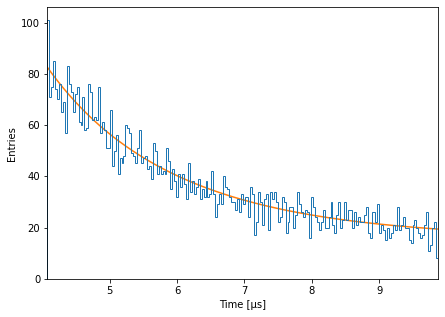

In [285]:
fitresult = fit_spectrum(spectrum)
display(fitresult) 
draw_lifetime_spectrum(spectrum, fitresult)

[ 0.00315912 -0.29119098]


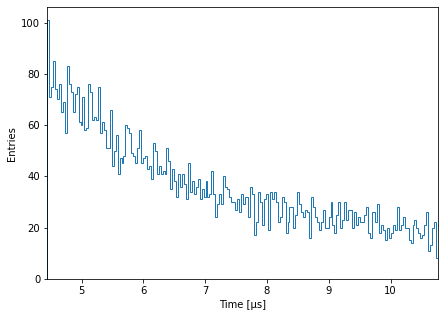

In [286]:
spectrum = raw_spectrum
spectrum = spectrum.rebin(start=1500, stop=3500, ngroup=10)
modified_calibration = calibration.values+ calibration.values*(0.013/0.3)
spectrum = spectrum.replace_axis(calibration.curve(*modified_calibration)(spectrum.edges), 'Time [μs]')
draw_lifetime_spectrum(spectrum)
print(modified_calibration)

FitResult(minuit=<iminuit._libiminuit.Minuit object at 0x55d44fcfa2c0>, names=('tau_mu', 'n', 'c'), values=array([   2.23431528, 1001.17729322,   15.79798252]), covariance=array([[ 4.57371917e-02, -2.19291246e+01, -3.23502232e-01],
       [-2.19291246e+01,  1.13675829e+04,  1.42096229e+02],
       [-3.23502232e-01,  1.42096229e+02,  2.64178809e+00]]), fcn=<function chi_squared.<locals>.fcn at 0x7f8ea91cc830>, fval=156.74414821726313, data={'x': array([ 4.46170771,  4.49329893,  4.52489014,  4.55648136,  4.58807258,
        4.6196638 ,  4.65125501,  4.68284623,  4.71443745,  4.74602867,
        4.77761988,  4.8092111 ,  4.84080232,  4.87239354,  4.90398476,
        4.93557597,  4.96716719,  4.99875841,  5.03034963,  5.06194084,
        5.09353206,  5.12512328,  5.1567145 ,  5.18830571,  5.21989693,
        5.25148815,  5.28307937,  5.31467058,  5.3462618 ,  5.37785302,
        5.40944424,  5.44103545,  5.47262667,  5.50421789,  5.53580911,
        5.56740032,  5.59899154,  5.63058276,  5.66217398,  5.69376519,
        5.72535641,  5.75694763,  5.78853885,  5.82013006,  5.85172128,
        5.8833125 ,  5.91490372,  5.94649494,  5.97808615,  6.00967737,
        6.04126859,  6.07285981,  6.10445102,  6.13604224,  6.16763346,
        6.19922468,  6.23081589,  6.26240711,  6.29399833,  6.32558955,
        6.35718076,  6.38877198,  6.4203632 ,  6.45195442,  6.48354563,
        6.51513685,  6.54672807,  6.57831929,  6.6099105 ,  6.64150172,
        6.67309294,  6.70468416,  6.73627537,  6.76786659,  6.79945781,
        6.83104903,  6.86264025,  6.89423146,  6.92582268,  6.9574139 ,
        6.98900512,  7.02059633,  7.05218755,  7.08377877,  7.11536999,
        7.1469612 ,  7.17855242,  7.21014364,  7.24173486,  7.27332607,
        7.30491729,  7.33650851,  7.36809973,  7.39969094,  7.43128216,
        7.46287338,  7.4944646 ,  7.52605581,  7.55764703,  7.58923825,
        7.62082947,  7.65242068,  7.6840119 ,  7.71560312,  7.74719434,
        7.77878556,  7.81037677,  7.84196799,  7.87355921,  7.90515043,
        7.93674164,  7.96833286,  7.99992408,  8.0315153 ,  8.06310651,
        8.09469773,  8.12628895,  8.15788017,  8.18947138,  8.2210626 ,
        8.25265382,  8.28424504,  8.31583625,  8.34742747,  8.37901869,
        8.41060991,  8.44220112,  8.47379234,  8.50538356,  8.53697478,
        8.56856599,  8.60015721,  8.63174843,  8.66333965,  8.69493086,
        8.72652208,  8.7581133 ,  8.78970452,  8.82129574,  8.85288695,
        8.88447817,  8.91606939,  8.94766061,  8.97925182,  9.01084304,
        9.04243426,  9.07402548,  9.10561669,  9.13720791,  9.16879913,
        9.20039035,  9.23198156,  9.26357278,  9.295164  ,  9.32675522,
        9.35834643,  9.38993765,  9.42152887,  9.45312009,  9.4847113 ,
        9.51630252,  9.54789374,  9.57948496,  9.61107617,  9.64266739,
        9.67425861,  9.70584983,  9.73744105,  9.76903226,  9.80062348,
        9.8322147 ,  9.86380592,  9.89539713,  9.92698835,  9.95857957,
        9.99017079, 10.021762  , 10.05335322, 10.08494444, 10.11653566,
       10.14812687, 10.17971809, 10.21130931, 10.24290053, 10.27449174,
       10.30608296, 10.33767418, 10.3692654 , 10.40085661, 10.43244783,
       10.46403905, 10.49563027, 10.52722148, 10.5588127 , 10.59040392,
       10.62199514, 10.65358635, 10.68517757, 10.71676879, 10.74836001]), 'y': array([101.,  71.,  75.,  85.,  74.,  70.,  76.,  65.,  69.,  57.,  83.,
        76.,  73.,  65.,  72.,  75.,  61.,  60.,  71.,  58.,  59.,  76.,
        73.,  62.,  63.,  62.,  75.,  57.,  61.,  58.,  51.,  51.,  66.,
        44.,  50.,  56.,  41.,  47.,  45.,  48.,  60.,  59.,  57.,  49.,
        48.,  45.,  51.,  58.,  45.,  47.,  48.,  43.,  44.,  39.,  53.,
        50.,  41.,  44.,  41.,  42.,  41.,  51.,  46.,  35.,  43.,  38.,
        32.,  41.,  36.,  41.,  37.,  31.,  45.,  34.,  38.,  33.,  36.,
        39.,  31.,  35.,  32.,  38.,  32.,  33.,  42.,  33.,  24.,  29.,
        33.,  29.,  40.,  36.,  35.,  32.,  30.,  30.,  27.,  31.,  26.,
       

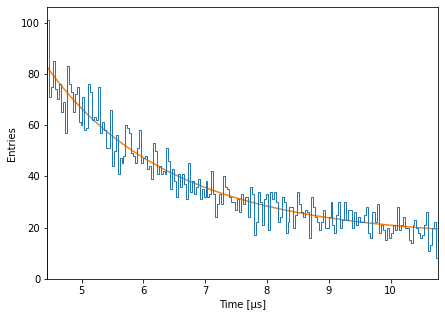

In [287]:
fitresult = fit_spectrum(spectrum)
display(fitresult) 
draw_lifetime_spectrum(spectrum, fitresult)

[ 0.00302791 -0.27909678]


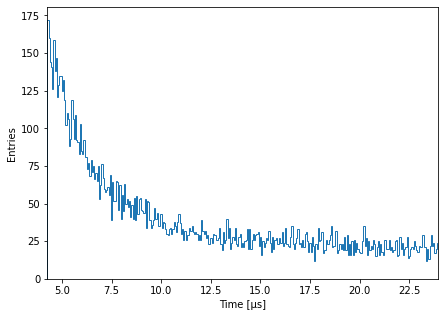

In [288]:
#Different Binning
spectrum = raw_spectrum
spectrum = spectrum.rebin(start=1500, stop=8000, ngroup=20)
modified_calibration = calibration.values
spectrum = spectrum.replace_axis(calibration.curve(*modified_calibration)(spectrum.edges), 'Time [μs]')
draw_lifetime_spectrum(spectrum)
print(modified_calibration)

FitResult(minuit=<iminuit._libiminuit.Minuit object at 0x55d45098da20>, names=('tau_mu', 'n', 'c'), values=array([   2.74225054, 1570.3169011 ,   22.60612406]), covariance=array([[ 8.70303237e-03, -5.38221183e+00, -2.60345451e-02],
       [-5.38221183e+00,  4.11607620e+03,  1.21460345e+01],
       [-2.60345451e-02,  1.21460345e+01,  1.91561756e-01]]), fcn=<function chi_squared.<locals>.fcn at 0x7f8ea8a644d0>, fval=285.502484207716, data={'x': array([ 4.29153673,  4.35209497,  4.41265322,  4.47321146,  4.5337697 ,
        4.59432795,  4.65488619,  4.71544444,  4.77600268,  4.83656093,
        4.89711917,  4.95767742,  5.01823566,  5.07879391,  5.13935215,
        5.19991039,  5.26046864,  5.32102688,  5.38158513,  5.44214337,
        5.50270162,  5.56325986,  5.62381811,  5.68437635,  5.7449346 ,
        5.80549284,  5.86605108,  5.92660933,  5.98716757,  6.04772582,
        6.10828406,  6.16884231,  6.22940055,  6.2899588 ,  6.35051704,
        6.41107529,  6.47163353,  6.53219178,  6.59275002,  6.65330826,
        6.71386651,  6.77442475,  6.834983  ,  6.89554124,  6.95609949,
        7.01665773,  7.07721598,  7.13777422,  7.19833247,  7.25889071,
        7.31944895,  7.3800072 ,  7.44056544,  7.50112369,  7.56168193,
        7.62224018,  7.68279842,  7.74335667,  7.80391491,  7.86447316,
        7.9250314 ,  7.98558964,  8.04614789,  8.10670613,  8.16726438,
        8.22782262,  8.28838087,  8.34893911,  8.40949736,  8.4700556 ,
        8.53061385,  8.59117209,  8.65173033,  8.71228858,  8.77284682,
        8.83340507,  8.89396331,  8.95452156,  9.0150798 ,  9.07563805,
        9.13619629,  9.19675454,  9.25731278,  9.31787103,  9.37842927,
        9.43898751,  9.49954576,  9.560104  ,  9.62066225,  9.68122049,
        9.74177874,  9.80233698,  9.86289523,  9.92345347,  9.98401172,
       10.04456996, 10.1051282 , 10.16568645, 10.22624469, 10.28680294,
       10.34736118, 10.40791943, 10.46847767, 10.52903592, 10.58959416,
       10.65015241, 10.71071065, 10.77126889, 10.83182714, 10.89238538,
       10.95294363, 11.01350187, 11.07406012, 11.13461836, 11.19517661,
       11.25573485, 11.3162931 , 11.37685134, 11.43740959, 11.49796783,
       11.55852607, 11.61908432, 11.67964256, 11.74020081, 11.80075905,
       11.8613173 , 11.92187554, 11.98243379, 12.04299203, 12.10355028,
       12.16410852, 12.22466676, 12.28522501, 12.34578325, 12.4063415 ,
       12.46689974, 12.52745799, 12.58801623, 12.64857448, 12.70913272,
       12.76969097, 12.83024921, 12.89080745, 12.9513657 , 13.01192394,
       13.07248219, 13.13304043, 13.19359868, 13.25415692, 13.31471517,
       13.37527341, 13.43583166, 13.4963899 , 13.55694814, 13.61750639,
       13.67806463, 13.73862288, 13.79918112, 13.85973937, 13.92029761,
       13.98085586, 14.0414141 , 14.10197235, 14.16253059, 14.22308884,
       14.28364708, 14.34420532, 14.40476357, 14.46532181, 14.52588006,
       14.5864383 , 14.64699655, 14.70755479, 14.76811304, 14.82867128,
       14.88922953, 14.94978777, 15.01034601, 15.07090426, 15.1314625 ,
       15.19202075, 15.25257899, 15.31313724, 15.37369548, 15.43425373,
       15.49481197, 15.55537022, 15.61592846, 15.6764867 , 15.73704495,
       15.79760319, 15.85816144, 15.91871968, 15.97927793, 16.03983617,
       16.10039442, 16.16095266, 16.22151091, 16.28206915, 16.34262739,
       16.40318564, 16.46374388, 16.52430213, 16.58486037, 16.64541862,
       16.70597686, 16.76653511, 16.82709335, 16.8876516 , 16.94820984,
       17.00876809, 17.06932633, 17.12988457, 17.19044282, 17.25100106,
       17.31155931, 17.37211755, 17.4326758 , 17.49323404, 17.55379229,
       17.61435053, 17.67490878, 17.73546702, 17.79602526, 17.85658351,
       17.91714175, 17.9777    , 18.03825824, 18.09881649, 18.15937473,
       18.21993298, 18.28049122, 18.34104947, 18.40160771, 18.46216595,
       18.5227242 , 18.58328244, 18.64384069, 18.70439893, 18.76495718,
       18.82551542, 18.88607367, 18.94663191, 19.00719016, 19.0677484 ,
       19.12830664, 19.18

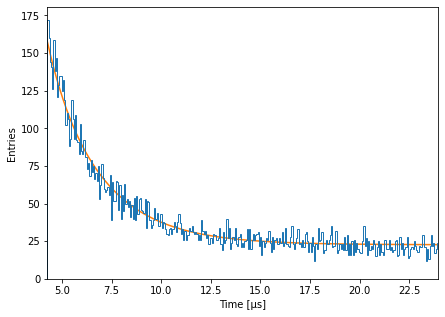

In [289]:
fitresult = fit_spectrum(spectrum)
display(fitresult) 
draw_lifetime_spectrum(spectrum, fitresult)

[ 0.00302791 -0.27909678]


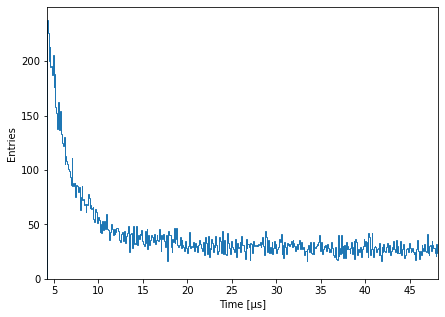

In [290]:
#Different Binning
spectrum = raw_spectrum
spectrum = spectrum.rebin(start=1500, stop=16000, ngroup=29)
modified_calibration = calibration.values
spectrum = spectrum.replace_axis(calibration.curve(*modified_calibration)(spectrum.edges), 'Time [μs]')
draw_lifetime_spectrum(spectrum)
print(modified_calibration)

FitResult(minuit=<iminuit._libiminuit.Minuit object at 0x55d450331340>, names=('tau_mu', 'n', 'c'), values=array([   3.04879387, 2097.35218886,   29.77149108]), covariance=array([[ 7.83623444e-03, -5.52197965e+00, -1.17625726e-02],
       [-5.52197965e+00,  5.03162046e+03,  5.81121007e+00],
       [-1.17625726e-02,  5.81121007e+00,  9.16965004e-02]]), fcn=<function chi_squared.<locals>.fcn at 0x7f8ea8959320>, fval=486.96659817502, data={'x': array([ 4.30516233,  4.39297179,  4.48078124,  4.5685907 ,  4.65640015,
        4.7442096 ,  4.83201906,  4.91982851,  5.00763797,  5.09544742,
        5.18325688,  5.27106633,  5.35887579,  5.44668524,  5.5344947 ,
        5.62230415,  5.71011361,  5.79792306,  5.88573251,  5.97354197,
        6.06135142,  6.14916088,  6.23697033,  6.32477979,  6.41258924,
        6.5003987 ,  6.58820815,  6.67601761,  6.76382706,  6.85163652,
        6.93944597,  7.02725542,  7.11506488,  7.20287433,  7.29068379,
        7.37849324,  7.4663027 ,  7.55411215,  7.64192161,  7.72973106,
        7.81754052,  7.90534997,  7.99315943,  8.08096888,  8.16877833,
        8.25658779,  8.34439724,  8.4322067 ,  8.52001615,  8.60782561,
        8.69563506,  8.78344452,  8.87125397,  8.95906343,  9.04687288,
        9.13468234,  9.22249179,  9.31030124,  9.3981107 ,  9.48592015,
        9.57372961,  9.66153906,  9.74934852,  9.83715797,  9.92496743,
       10.01277688, 10.10058634, 10.18839579, 10.27620525, 10.3640147 ,
       10.45182415, 10.53963361, 10.62744306, 10.71525252, 10.80306197,
       10.89087143, 10.97868088, 11.06649034, 11.15429979, 11.24210925,
       11.3299187 , 11.41772816, 11.50553761, 11.59334706, 11.68115652,
       11.76896597, 11.85677543, 11.94458488, 12.03239434, 12.12020379,
       12.20801325, 12.2958227 , 12.38363216, 12.47144161, 12.55925107,
       12.64706052, 12.73486997, 12.82267943, 12.91048888, 12.99829834,
       13.08610779, 13.17391725, 13.2617267 , 13.34953616, 13.43734561,
       13.52515507, 13.61296452, 13.70077398, 13.78858343, 13.87639288,
       13.96420234, 14.05201179, 14.13982125, 14.2276307 , 14.31544016,
       14.40324961, 14.49105907, 14.57886852, 14.66667798, 14.75448743,
       14.84229689, 14.93010634, 15.01791579, 15.10572525, 15.1935347 ,
       15.28134416, 15.36915361, 15.45696307, 15.54477252, 15.63258198,
       15.72039143, 15.80820089, 15.89601034, 15.9838198 , 16.07162925,
       16.15943871, 16.24724816, 16.33505761, 16.42286707, 16.51067652,
       16.59848598, 16.68629543, 16.77410489, 16.86191434, 16.9497238 ,
       17.03753325, 17.12534271, 17.21315216, 17.30096162, 17.38877107,
       17.47658052, 17.56438998, 17.65219943, 17.74000889, 17.82781834,
       17.9156278 , 18.00343725, 18.09124671, 18.17905616, 18.26686562,
       18.35467507, 18.44248453, 18.53029398, 18.61810343, 18.70591289,
       18.79372234, 18.8815318 , 18.96934125, 19.05715071, 19.14496016,
       19.23276962, 19.32057907, 19.40838853, 19.49619798, 19.58400744,
       19.67181689, 19.75962634, 19.8474358 , 19.93524525, 20.02305471,
       20.11086416, 20.19867362, 20.28648307, 20.37429253, 20.46210198,
       20.54991144, 20.63772089, 20.72553035, 20.8133398 , 20.90114925,
       20.98895871, 21.07676816, 21.16457762, 21.25238707, 21.34019653,
       21.42800598, 21.51581544, 21.60362489, 21.69143435, 21.7792438 ,
       21.86705326, 21.95486271, 22.04267216, 22.13048162, 22.21829107,
       22.30610053, 22.39390998, 22.48171944, 22.56952889, 22.65733835,
       22.7451478 , 22.83295726, 22.92076671, 23.00857617, 23.09638562,
       23.18419507, 23.27200453, 23.35981398, 23.44762344, 23.53543289,
       23.62324235, 23.7110518 , 23.79886126, 23.88667071, 23.97448017,
       24.06228962, 24.15009908, 24.23790853, 24.32571798, 24.41352744,
       24.50133689, 24.58914635, 24.6769558 , 24.76476526, 24.85257471,
       24.94038417, 25.02819362, 25.11600308, 25.20381253, 25.29162199,
       25.37943144, 25.46724089, 25.55505035, 25.6428598 , 25.73066926,
       25.81847871, 25.906

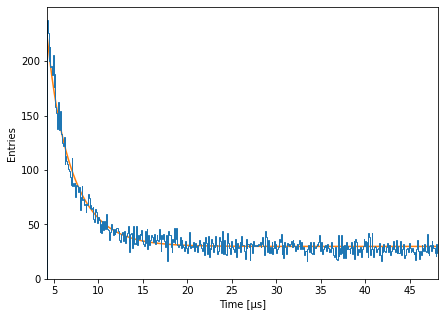

In [291]:
fitresult = fit_spectrum(spectrum)
display(fitresult) 
draw_lifetime_spectrum(spectrum, fitresult)